# Lineární Regrese

Úloha zaměřená na implementaci lineární regrese pomocí metody LSE.

Data reprezentují výsledky zkoušky, konkrétně bodový zisk v závislosti na době studia.

Import knihoven:

In [1]:
import numpy as np
import usu

Načtení dat:

In [2]:
npzfile = np.load('data/data_02.npz')
npzfile.files


['x0', 'x1']

Přiřazení dat do nezávislé a závislé proměnné:

In [3]:
x = npzfile['x0']
y = npzfile['x1']
x.shape, y.shape # 100 radku a 1 sloupec


((100, 1), (100, 1))

Vykreslení dat:

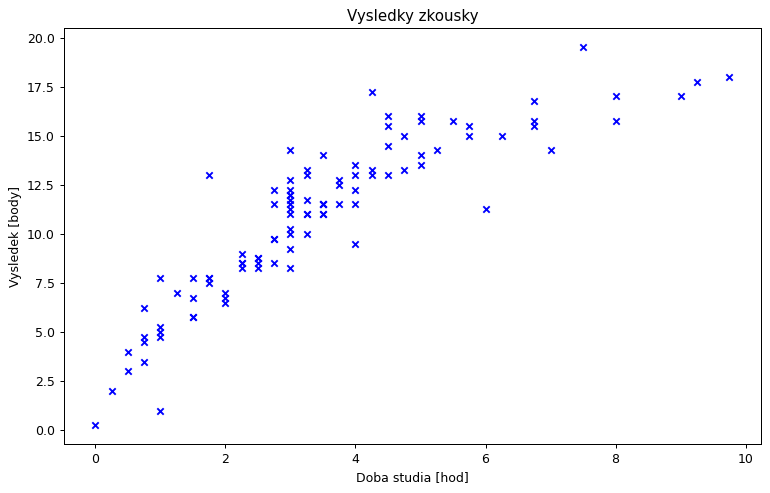

In [4]:
usu.draw(x, y, "Vysledky zkousky", "Doba studia [hod]", "Vysledek [body]")

## LSE (Least-Squares Estimation)


### Odhad parametrů $\theta$ :

$$ \theta = (\tilde{X^T} \tilde{X})^{-1} \tilde{X^T} y $$  
kde $\tilde{X}$ je rozšířená matice dat $X$ (je rozšířená o jeden sloupec s hodnotami 1)

#### Příklad matice $\tilde{X}$ pro lineární regresi:

$$
    X = 
        \begin{bmatrix}
        1 \\
        2 \\
        3\\
        \end{bmatrix} 
    \implies
        \tilde{X} = 
        \begin{bmatrix}
        1 & 1 \\
        1 & 2 \\
        1 & 3\\
        \end{bmatrix} 
$$


#### Příklad matice  $\tilde{X}$ pro polynomiální regresi:

* Každá vyšší mocnina $X$ je v případě PR považována za **další nezávislou proměnnou**.

$$
    X = 
        \begin{bmatrix}
        1 & 1 \\
        2 & 4 \\
        3 & 9 \\
        \end{bmatrix} 
    \implies
    \tilde{X} = 
        \begin{bmatrix}
        1 & 1 & 1 \\
        1 & 2 & 4 \\
        1 & 3 & 9 \\
        \end{bmatrix} 
$$


### Odhad  $\theta$ se zapojením regularizace:
$$ \theta = (\tilde{X^T} \tilde{X} + \lambda I)^{-1} \tilde{X^T} y $$  
kde $\lambda$ je koeficient regularizace (hyperparametr), $I$ je jednotková matice o rozměrech $n \times n$ ($n$ je počet sloupců matice $\tilde{X}$)

Funkce pro odhad parametrů theta:

In [10]:
def computeThetaLSE(vec_x, vec_y, ordr=1, lambd=0):
    """
    x - vektor vstupnich hodnot (doba studia)
    y - vektor vystupnich  hodnot (zisk bodu)
    order - rad polynomu
    lmbd - regularizacni parametr lambda
    
    """
    #################################################################

    vec_x = np.insert(vec_x, 0, 1, axis=1)

    if ordr >= 2:
        for i in range(2, ordr+1):
            vec_x = np.insert(vec_x, i, vec_x[:,1]**i, axis=1)



    # np.set_printoptions(precision=3)
    # print("X = ", vec_x)
    n = vec_x.shape[1] # pocet sloupcu/radku matice X
    _theta = np.linalg.inv(vec_x.T.dot(vec_x) + lambd*np.identity(n)).dot(vec_x.T).dot(vec_y)

    #################################################################
    
    return _theta

Linearní regrese bez regularizace (polynom 1. řádu):

In [12]:
theta = computeThetaLSE(x, y)
print("Theta = ", theta)

Theta =  [[4.843]
 [1.745]]


Vykreslení výsledků regrese:

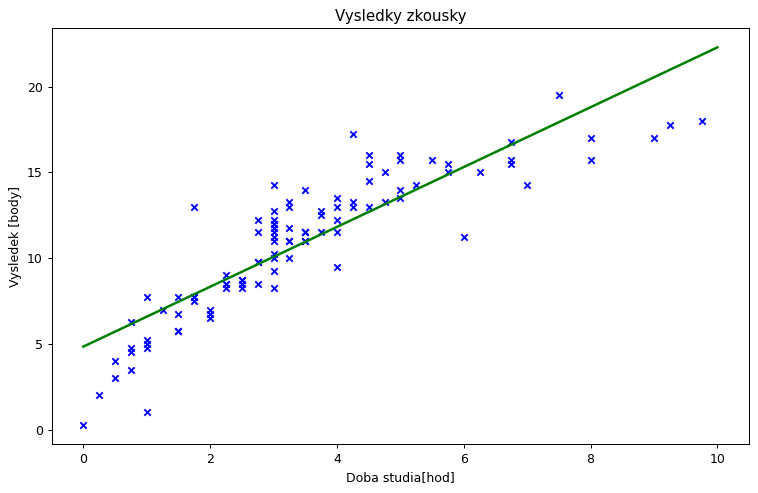

In [13]:
#vstupni paremetry do funkce usu.dra (theta, x a y) musi byt typu np.array nikoli matrix

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta)

Určete předpokládaný zisk bodů v případě přípravy v délce 4 hodin:

x : 4.000, y : 11.824


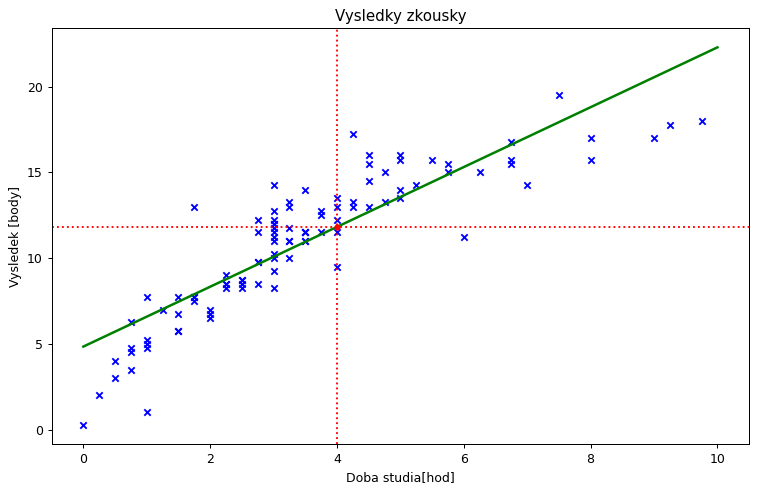

In [14]:
#################################################################
# ZDE DOPLNIT

valueX = 4
valueY = theta[0] + theta[1]*valueX
usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)
#################################################################


Určete předpokládanou dobu studia v případě zisku 12 bodů:

x : 4.101, y : 12.000


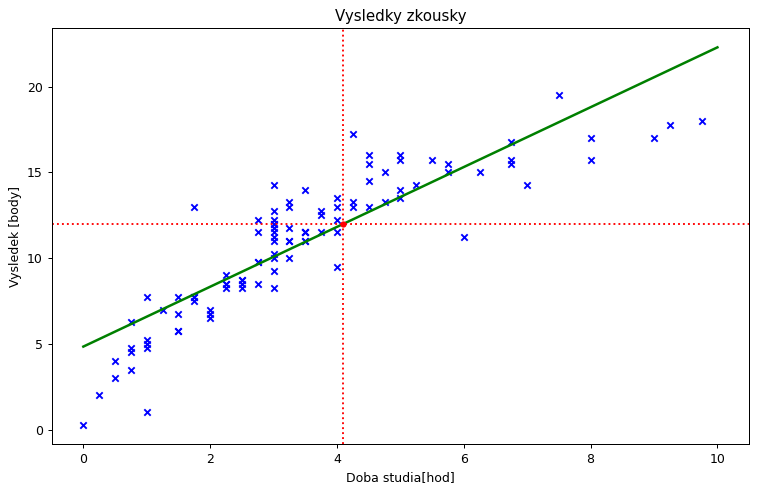

In [15]:
#################################################################
# ZDE DOPLNIT

valueY = 12
valueX = (valueY - theta[0])/theta[1]

#################################################################

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)


### Polynomiální regrese

Určete předpokládaný zisk bodů v případě přípravy v délce 4 hodin, řádu polynomu 2 a 𝜆 1:

x : 4.000, y : 12.844


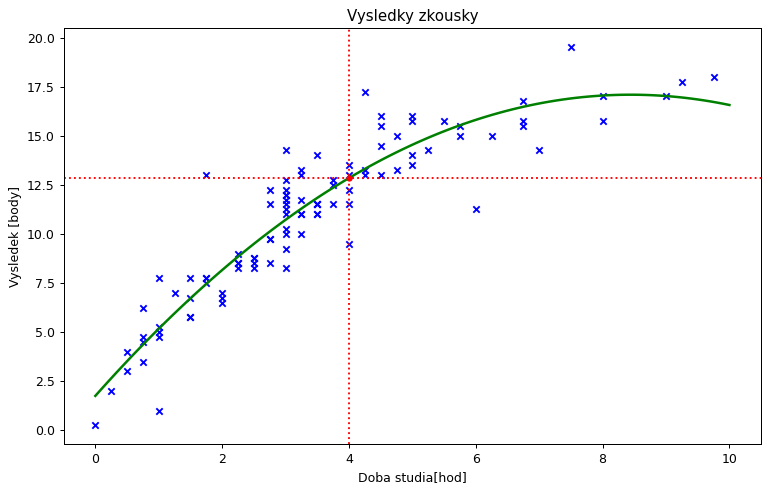

In [16]:
order = 2
lmbd = 1
theta = computeThetaLSE(x, y, order, lmbd)

#################################################################
# ZDE DOPLNIT

valueX = 4
valueY = theta[0] + theta[1]*valueX + theta[2]*valueX**2
# Nejvhodnejsi rad polynomu a proc: ...

#################################################################

usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta, valueX, valueY)


### Exponenciální regrese

Reší se jako lineární regrese pro data s hodnotami $[x,\log{(y)}]$

In [17]:
npzfile = np.load('data/data_02_exp.npz')
npzfile.files

['x0', 'x1']

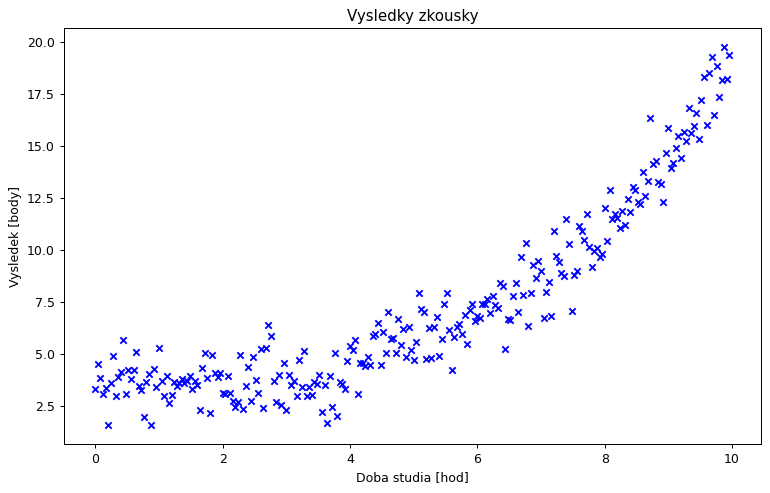

In [18]:
x_exp = npzfile['x0']
y_exp = npzfile['x1']
usu.draw(x_exp, y_exp, "Vysledky zkousky", "Doba studia [hod]", "Vysledek [body]")


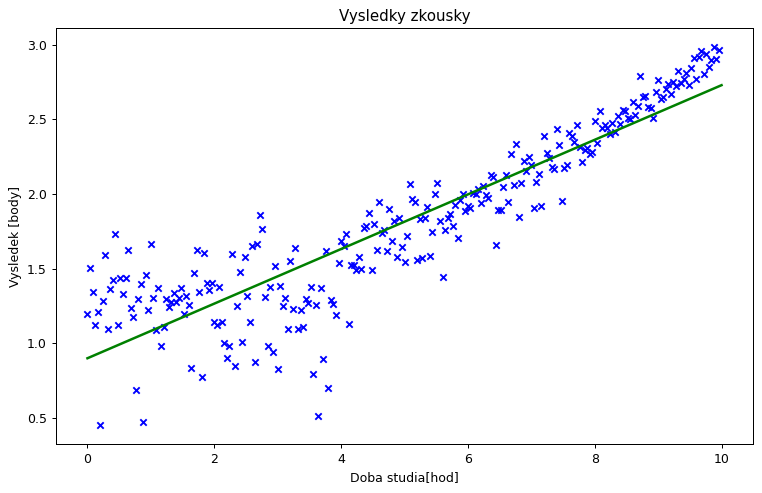

In [26]:
#################################################################
# ZDE DOPLNIT

theta = computeThetaLSE(x_exp, np.log(y_exp))
usu.draw(x_exp, np.log(y_exp), "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", theta)

#################################################################


Určete předpokládaný zisk bodů v případě přípravy v délce 4 hodin:

Predpokladany zisk bodu:  [9.6405175]
x : 4.000, y : 9.641


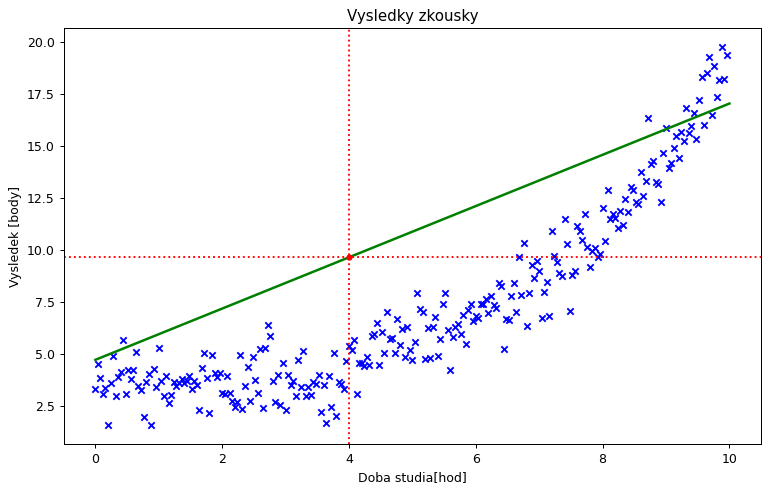

Predpokladany zisk bodu:  [9.6405175]
x : 4.000, y : 9.641


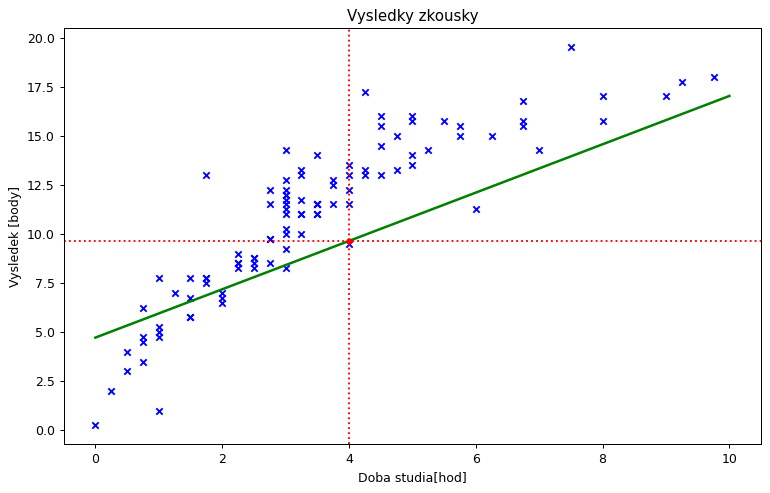

In [38]:
#################################################################
# ZDE DOPLNIT


# nekolik uprav ve vykreslovani grafu
# pouzit dataset x_exp, y_exp misto x, y
# pouzit funkci np.exp(theta) misto theta

valueX = 4
valueY = np.exp(theta[0]) + np.exp(theta[1])*valueX
print("Predpokladany zisk bodu: ", valueY)
usu.draw(x_exp, y_exp, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", np.exp(theta), valueX, valueY)

theta = computeThetaLSE(x, np.log(y))
valueX = 4
valueY = np.exp(theta[0]) + np.exp(theta[1])*valueX
print("Predpokladany zisk bodu: ", valueY)
usu.draw(x, y, "Vysledky zkousky", "Doba studia[hod]", "Vysledek [body]", np.exp(theta), valueX, valueY)

#################################################################
